In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
13496,201503,Sun Country Airlines,SY,Sun Country Airlines,SY,International,Mexico,Deplaned,Low Fare,International,A,315
5809,200908,US Airways,US,US Airways,US,Domestic,US,Enplaned,Other,Terminal 1,B,78332
12014,201402,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,International,G,19822
2497,200704,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,369304
6351,201001,Mesaba Airlines,XJ,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,1513
16025,201611,Lufthansa German Airlines,LH,Lufthansa German Airlines,LH,International,Europe,Deplaned,Other,International,G,17784
2979,200708,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Deplaned,Other,Terminal 3,F,18769
8721,201109,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Mexico,Enplaned,Other,International,G,5440
14644,201601,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,9447
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271


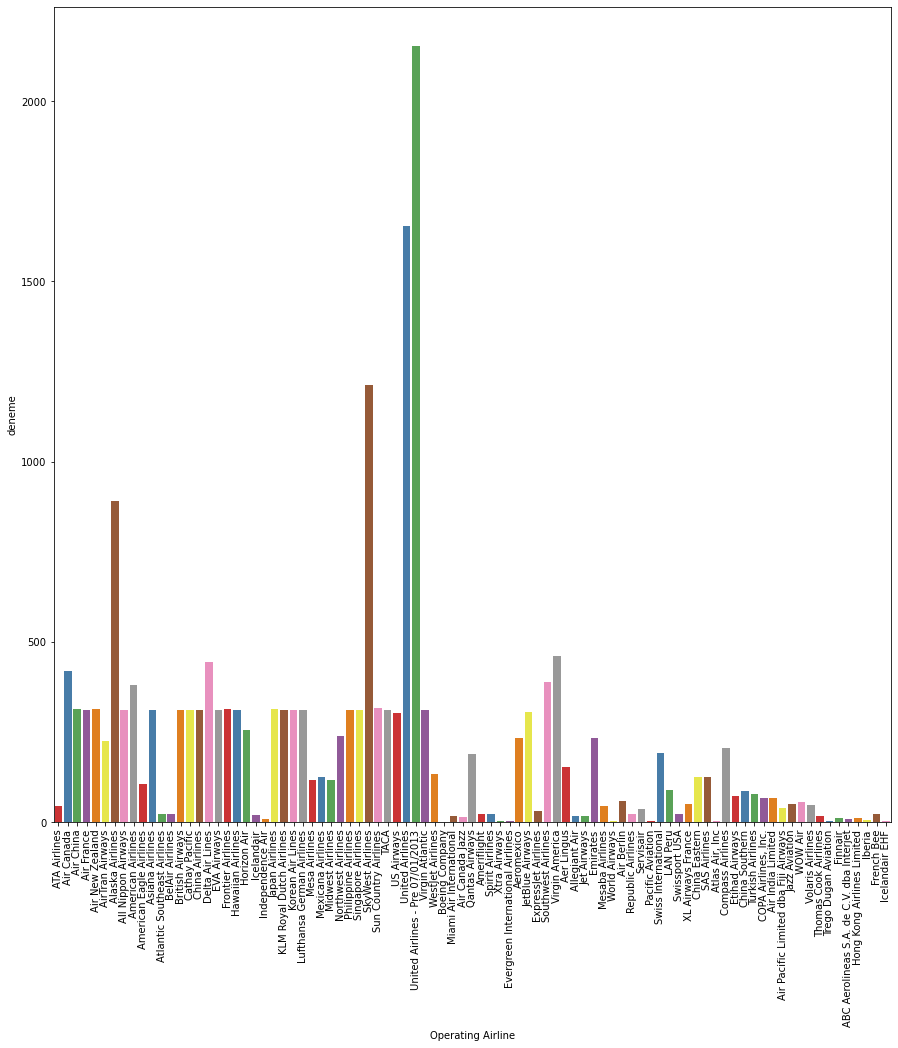

In [69]:
plt.figure(figsize=(15,15))
sns.countplot(x="Operating Airline",palette="Set1",data=df)
plt.xticks(rotation=90)
plt.ylabel("deneme")
plt.show()

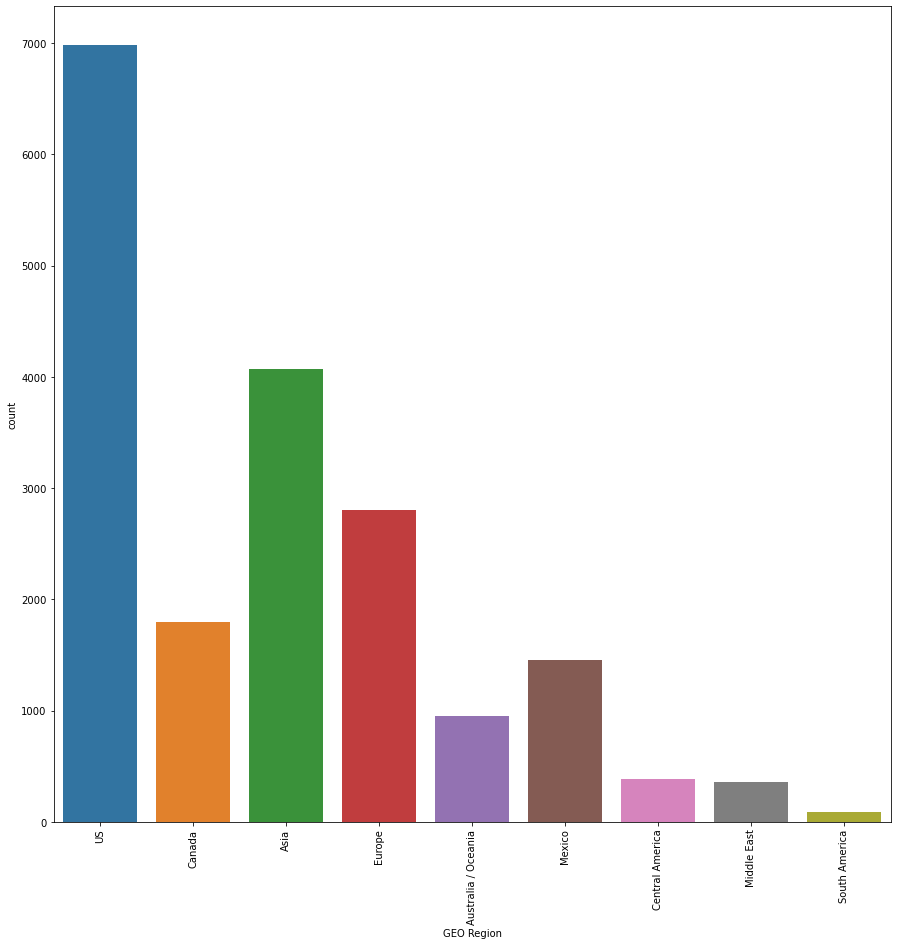

In [70]:
plt.figure(figsize=(15,15))
sns.countplot(x="GEO Region",data=df)
plt.xticks(rotation=90)
plt.show()

In [76]:
airline_count = df["Operating Airline"].value_counts().sort_index()

In [75]:
passenger_count = df.groupby("Operating Airline").sum()["Passenger Count"]

In [15]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [16]:
df["Operating Airline IATA Code"].value_counts()

UA    3807
OO    1212
AS     891
VX     462
DL     445
      ... 
IB       6
WO       3
XP       2
5Y       2
EZ       2
Name: Operating Airline IATA Code, Length: 82, dtype: int64

In [17]:
df["Operating Airline IATA Code"].fillna("UA",inplace=True)

In [18]:
df["Published Airline IATA Code"].value_counts()

UA     4649
AS     1203
DL      975
AA      588
AC      484
       ... 
BBB       6
WO        3
EZ        2
XP        2
5Y        2
Name: Published Airline IATA Code, Length: 73, dtype: int64

In [21]:
df["Published Airline IATA Code"].fillna("UA",inplace=True)

In [22]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18885 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18885 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [30]:
df["Activity Type Code"].value_counts()

Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: Activity Type Code, dtype: int64

In [27]:
df["Published Airline"].nunique()

79

In [31]:
df_dummies = pd.get_dummies(df,drop_first=True)

In [32]:
model = KMeans(n_clusters=4)

In [33]:
model = model.fit(df_dummies)

In [34]:
pred = model.predict(df_dummies)

In [38]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [39]:
sonuc = pd.DataFrame(pred)

In [41]:
sonuc.value_counts()

0    15349
3     2007
2     1138
1      391
dtype: int64

In [42]:
silhouette_score(df_dummies,sonuc)

0.7852585144912243

In [43]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        model = model.fit(x)
        pred = model.predict(x)
        score = silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))

In [44]:
clust = df_dummies.assign(Cluster = model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

No handles with labels found to put in legend.


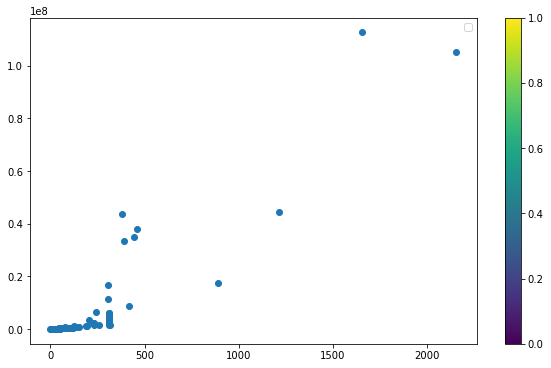

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(df["Passenger Count"],df["Activity Period"],c=sonuc)
plt.legend()
plt.colorbar()
plt.show()

In [49]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters = no_of_cluster)
        pred = model.fit_predict(df_dummies)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(df_dummies,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2, silhouette 0.8594457249743398
Number of cluster 3, silhouette 0.8281862100920712
Number of cluster 4, silhouette 0.7852585144912243
Number of cluster 5, silhouette 0.7837146504151541
Number of cluster 6, silhouette 0.6584181547982849
Number of cluster 7, silhouette 0.6589522242051296
Number of cluster 8, silhouette 0.6428578351061881
Number of cluster 9, silhouette 0.6362975230567085


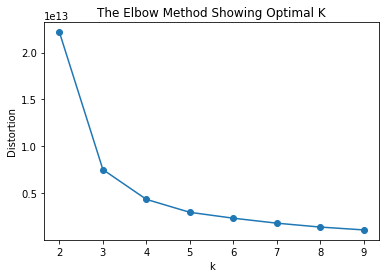

In [58]:
plt.plot(allclusters,sum_of_squared_distances,marker="o")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method Showing Optimal K")
plt.show()